# FINAL PROJECT 1: LINEAR REGRESSION

# 1. Perkenalan

Our Members:
1. Safril Ahmadi Sanmas / PYTN-KS17-022
2. Maulana Ridhwan Riziq / PYTN-KS17-010
3. Nadyla Alfiena Candra / PYTN-KS17-012
4. Novi Sabaniatir Rohmah / PYTN-KS17-023


## 1.1 Pendahuluan
Uber dan Lyft merupakan perusahaan yang bergerak di bidang jual beli jasa yang dilakukan melalui suatu aplikasi dimana jasa yang ditawarkan mulai dari jasa transportasi hingga pengiriman online. Kedua perusahaan tersebut membawa banyak dampak positif baik bagi masyarakat maupun pemerintah. Bagi masyarakat, kehadiran perusahaan tersebut mempermudah masyarakat untuk mendapatkan jasa transportasi serta jasa pengiriman secara mudah, cepat, dan praktis. Sedangkan dampak positif yang diperoleh pemerintah dari kehadiran perusahaan tersebut yaitu menambah lapangan pekerjaan dan membantu pertumbuhan ekonomi.  Oleh sebab itu, model ini akan menggunakan perusahaan Uber dan Lyft sebagai objek dalam kasus yang akan diteliti. 

Data yang akan digunakan merupakan data yang bersumber dari website kaggle sesuai dengan instruksi dalam Final Project 1. Penentuan jumlah data yang digunakan yaitu lebih dari 30 untuk memastikan bahwa data terdistribusi normal, tepatnya akan ada 600,000 data yang digunakan. Pengembangan model ini dilakukan guna mengetahui apa dan bagaimana feature-feature mempengaruhi tingkat harga dari jasa ditawarkan. 

Dataset yang digunakan yaitu Uber vs Lyft Dataset New York, USA yang berisi record data perjalanan taksi online Uber dan Lyft di New York, USA. Dataset ini memiliki 57 atribut, tetapi yang paling relevan ada 10 atribut dari semuanya. Dari 57 atribut, data yang diperlukan untuk proyek ini antara lain:

- Cab_type: Merek transportasi online (Uber, Lyft).
- Name: Jenis mobil yang dipilih (Lux, Lux Black XL, Lyft, Lyft XL, UberXL, Taxi, Uberpool, Black SUV, WAV, Black, UberX, Lux Black, Shared).
- Hour: Pukul berapa transportasi online dipesan (24 jam).
- Day: Tanggal berapa transportasi online dipesan.
- Month: Bulan apa saja transportasi online dipesan (bulan 11 dan 12).
- Source: Destinasi awal.
- Destination: Destinasi akhir.
- Price: Harga transportasi online (dollar US).
- Distance: Jarak yang ditempuh (km).
- Short_summary: Cuaca ketika transportasi online dipesan (Overcast, Mostly Cloudy, Partly Cloudy, Clear, Light Rain, Rain, Possible Drizzle, Foggy, Drizzle).
- Temperature: Suhu ketika transportasi online dipesan (Celcius).
- Visibility: Jarak penglihatan.
- Surge_multiplier: Kenaikan harga penawaran ketika terjadi lonjakan penumpang.

## 1.2 Objective

- Mampu memahami konsep regression dengan Linear Regression
- Mampu mempersiapkan data untuk digunakan dalam model Linear Regression
- Mampu mengimplementasikan Linear Regression untuk membuat prediksi

# 2. Import Pustaka

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from datetime import date
import calendar

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# 3. Data Loading

In [2]:
df = pd.read_csv ("D:/Python for Data Science/Data/rideshare_kaggle.csv") 
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [3]:
# menyalin dataframe
dc = df.copy()

In [4]:
# Menampilkan semua kolom dataframe
pd.set_option('display.max_columns', 500)

In [5]:
# Melihat dimensi dataframe
dc.shape

(693071, 57)

In [6]:
# Melihat 5 data teratas
dc.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [7]:
# Melihat 5 data terbawah
dc.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,10.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [8]:
# Melihat informasi data
dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [9]:
# Melihat kolom-kolom pada data
dc.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [10]:
# Melihat Statistik Dataframe secara umum
dc.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

In [11]:
#Melihat Statistik deskriptif dari kolom yang bertipe object
dc.describe(include='O')

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
count,693071,693071,693071,693071,693071,693071,693071,693071,693071,693071,693071
unique,693071,31350,1,12,12,2,13,13,9,11,7
top,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-11-26 23:21:14,America/New_York,Financial District,Financial District,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,Overcast,Mostly cloudy throughout the day.,cloudy
freq,1,156,693071,58857,58851,385663,55096,55096,218895,202340,218895


In [12]:
# Melihat jumlah nilai unique dari data
dc.nunique()

id                             693071
timestamp                       36179
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

In [13]:
for col in dc.columns:
    print("UNIQUE VALUES FOR ",col)
    print("="*40)
    print(dc[col].unique())

UNIQUE VALUES FOR  id
['424553bb-7174-41ea-aeb4-fe06d4f4b9d7'
 '4bd23055-6827-41c6-b23b-3c491f24e74d'
 '981a3613-77af-4620-a42a-0c0866077d1e' ...
 '64d451d0-639f-47a4-9b7c-6fd92fbd264f'
 '727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e'
 'e7fdc087-fe86-40a5-a3c3-3b2a8badcbda']
UNIQUE VALUES FOR  timestamp
[1.54495261e+09 1.54328402e+09 1.54336682e+09 ... 1.54377528e+09
 1.54507051e+09 1.54473900e+09]
UNIQUE VALUES FOR  hour
[ 9  2  1  4  3 18  5 19  6 10 16 22 23  0 14 11  7 20 13  8 12 21 17 15]
UNIQUE VALUES FOR  day
[16 27 28 30 29 17 26  2  3 13 14  1 18 15  4 10  9]
UNIQUE VALUES FOR  month
[12 11]
UNIQUE VALUES FOR  datetime
['2018-12-16 09:30:07' '2018-11-27 02:00:23' '2018-11-28 01:00:22' ...
 '2018-12-17 07:15:07' '2018-11-30 05:23:02' '2018-11-29 17:38:01']
UNIQUE VALUES FOR  timezone
['America/New_York']
UNIQUE VALUES FOR  source
['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financi

# 4. Data Cleaning

In [14]:
# Mengecek duplikat pada data
dc.duplicated().sum()

0

In [15]:
# Mengecek missing value pada data
dc.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [16]:
# Menampilkan jumlah missing value dalam jumlah (%)
print(dc['price'].isnull().sum()/dc.shape[0]*100,'%')

7.949402009317949 %


In [17]:
# Membuang data yang missing value
dc1 = dc.drop(dc[dc['price'].isnull()].index)

In [18]:
# Melihat dimensi dataframe
dc1.shape

(637976, 57)

In [19]:
# Mengecek lagi apakah masih terdapat missing value
dc1.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [20]:
# Membuat kolom baru yang berisikan harga taxi per jarak
dc2 = dc1.copy()

dc2['fare_per_distance'] = dc2['price'] / dc2['distance']

In [21]:
dc2.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,fare_per_distance
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,11.363636
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,25.000000
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,15.909091
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,59.090909
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,20.454545


In [22]:
# Menjadikan kolom datetime menjadi object datetime dan membuat kolom baru yang berisi nama hari
dc2['datetime'] = dc2['datetime'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
dc2['day_of_the_week'] = dc2['datetime'].apply(lambda x: calendar.day_name[x.weekday()])

In [23]:
dc2.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,fare_per_distance,day_of_the_week
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,11.363636,Sunday
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,25.000000,Tuesday
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,15.909091,Wednesday
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,59.090909,Friday
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,20.454545,Thursday


# 5. Eksplorasi Data

In [24]:
# Melihat jarak terjauh dan terdekat yang ditempuh taxi uber dalam mengangkut penumpang
dc2.loc[dc2['cab_type'] == 'Uber', 'distance'].agg(('min', 'max'))

min    0.02
max    7.86
Name: distance, dtype: float64

In [25]:
# Melihat harga tertinggi dan terendah yang didapatkan taxi uber dalam mengangkut penumpang
dc2.loc[dc2['cab_type'] == 'Uber', 'price'].agg(('min', 'max'))

min     4.5
max    89.5
Name: price, dtype: float64

In [26]:
# Melihat jarak terjauh dan terdekat yang ditempuh taxi Lyft dalam mengangkut penumpang
dc2.loc[dc2['cab_type'] == 'Lyft', 'distance'].agg(('min', 'max'))

min    0.39
max    6.33
Name: distance, dtype: float64

In [27]:
# Melihat Melihat harga tertinggi dan terendah yang didapatkan taxi Lyft
dc2.loc[dc2['cab_type'] == 'Lyft', 'price'].agg(('min', 'max'))

min     2.5
max    97.5
Name: price, dtype: float64

Dari hasil di atas diketahui bahwa jarak terdekat yang ditempuh taxi Uber dalam mengangkut penumpang adalah 0.02 mil dan yang terjauh 7.86 mil. Sedangkan taxi Lyft dalam mengangkut penumpang adalah 0.39 mil dan yang terjauh 6.33 mil. Untuk tarif, taxi Uber memiliki tarif tertinggi selama mengantar penumpang dengan harga tertinggi yaitu 89.5 dolar dan terendah 4.5 dolar. sedangkan taxi Lyft harga tertinggi dalam mengangkut penumpang yaitu 97.5 dolar dan terendah 2,5 dolar. Setelah dilihat kembali pada data, bahwa jarak terjauh dan terdekat yang ditempuh taxi tidak sama dengan tarif minimum dan maximum yang didapatkan. Hal ini dapat berarti bahwa ada faktor lain yang dapat mempengaruhi harga layanan taxi.

In [28]:
df = dc1.drop(['id','timestamp','datetime', 'timezone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'icon'], axis=1) 

In [29]:
df.head()

,hour,day,month,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,9,16,12,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,32.70,1021.98,57,0.72,0,10.000,303.8,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,2,27,11,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,41.83,1003.97,90,1.00,0,4.786,291.1,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1,28,11,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,31.10,992.28,240,0.03,0,10.000,315.7,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,4,30,11,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,26.64,1013.73,310,0.00,0,10.000,291.1,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,3,29,11,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,28.61,998.36,303,0.44,0,10.000,347.7,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [30]:
df1 = df[[
    'price',
    'distance',
    'cab_type',
    'surge_multiplier',
    'temperature',
    'apparentTemperature',
    'precipIntensity',
    'precipProbability',
    'humidity',
    'windSpeed',
    'windGust',
    'visibility',
    'temperatureHigh',
    'temperatureLow',
    'apparentTemperatureHigh',
    'apparentTemperatureLow',
    'dewPoint',
    'pressure',
    'windBearing',
    'cloudCover',
    'uvIndex',
    'ozone',
    'temperatureMin',
    'temperatureMax',
    'apparentTemperatureMin',
    'apparentTemperatureMax'
]]

df1.head()

,price,distance,cab_type,surge_multiplier,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,5.0,0.44,Lyft,1.0,42.34,37.12,0.0000,0.0,0.68,8.66,9.17,10.000,43.68,34.19,37.95,27.39,32.70,1021.98,57,0.72,0,303.8,39.89,43.68,33.73,38.07
1,11.0,0.44,Lyft,1.0,43.58,37.35,0.1299,1.0,0.94,11.98,11.98,4.786,47.30,42.10,43.92,36.20,41.83,1003.97,90,1.00,0,291.1,40.49,47.30,36.20,43.92
2,7.0,0.44,Lyft,1.0,38.33,32.93,0.0000,0.0,0.75,7.33,7.33,10.000,47.55,33.10,44.12,29.11,31.10,992.28,240,0.03,0,315.7,35.36,47.55,31.04,44.12
3,26.0,0.44,Lyft,1.0,34.38,29.63,0.0000,0.0,0.73,5.28,5.28,10.000,45.03,28.90,38.53,26.20,26.64,1013.73,310,0.00,0,291.1,34.67,45.03,30.30,38.53
4,9.0,0.44,Lyft,1.0,37.44,30.88,0.0000,0.0,0.70,9.14,9.14,10.000,42.18,36.71,35.75,30.29,28.61,998.36,303,0.44,0,347.7,33.10,42.18,29.11,35.75


<Axes: >

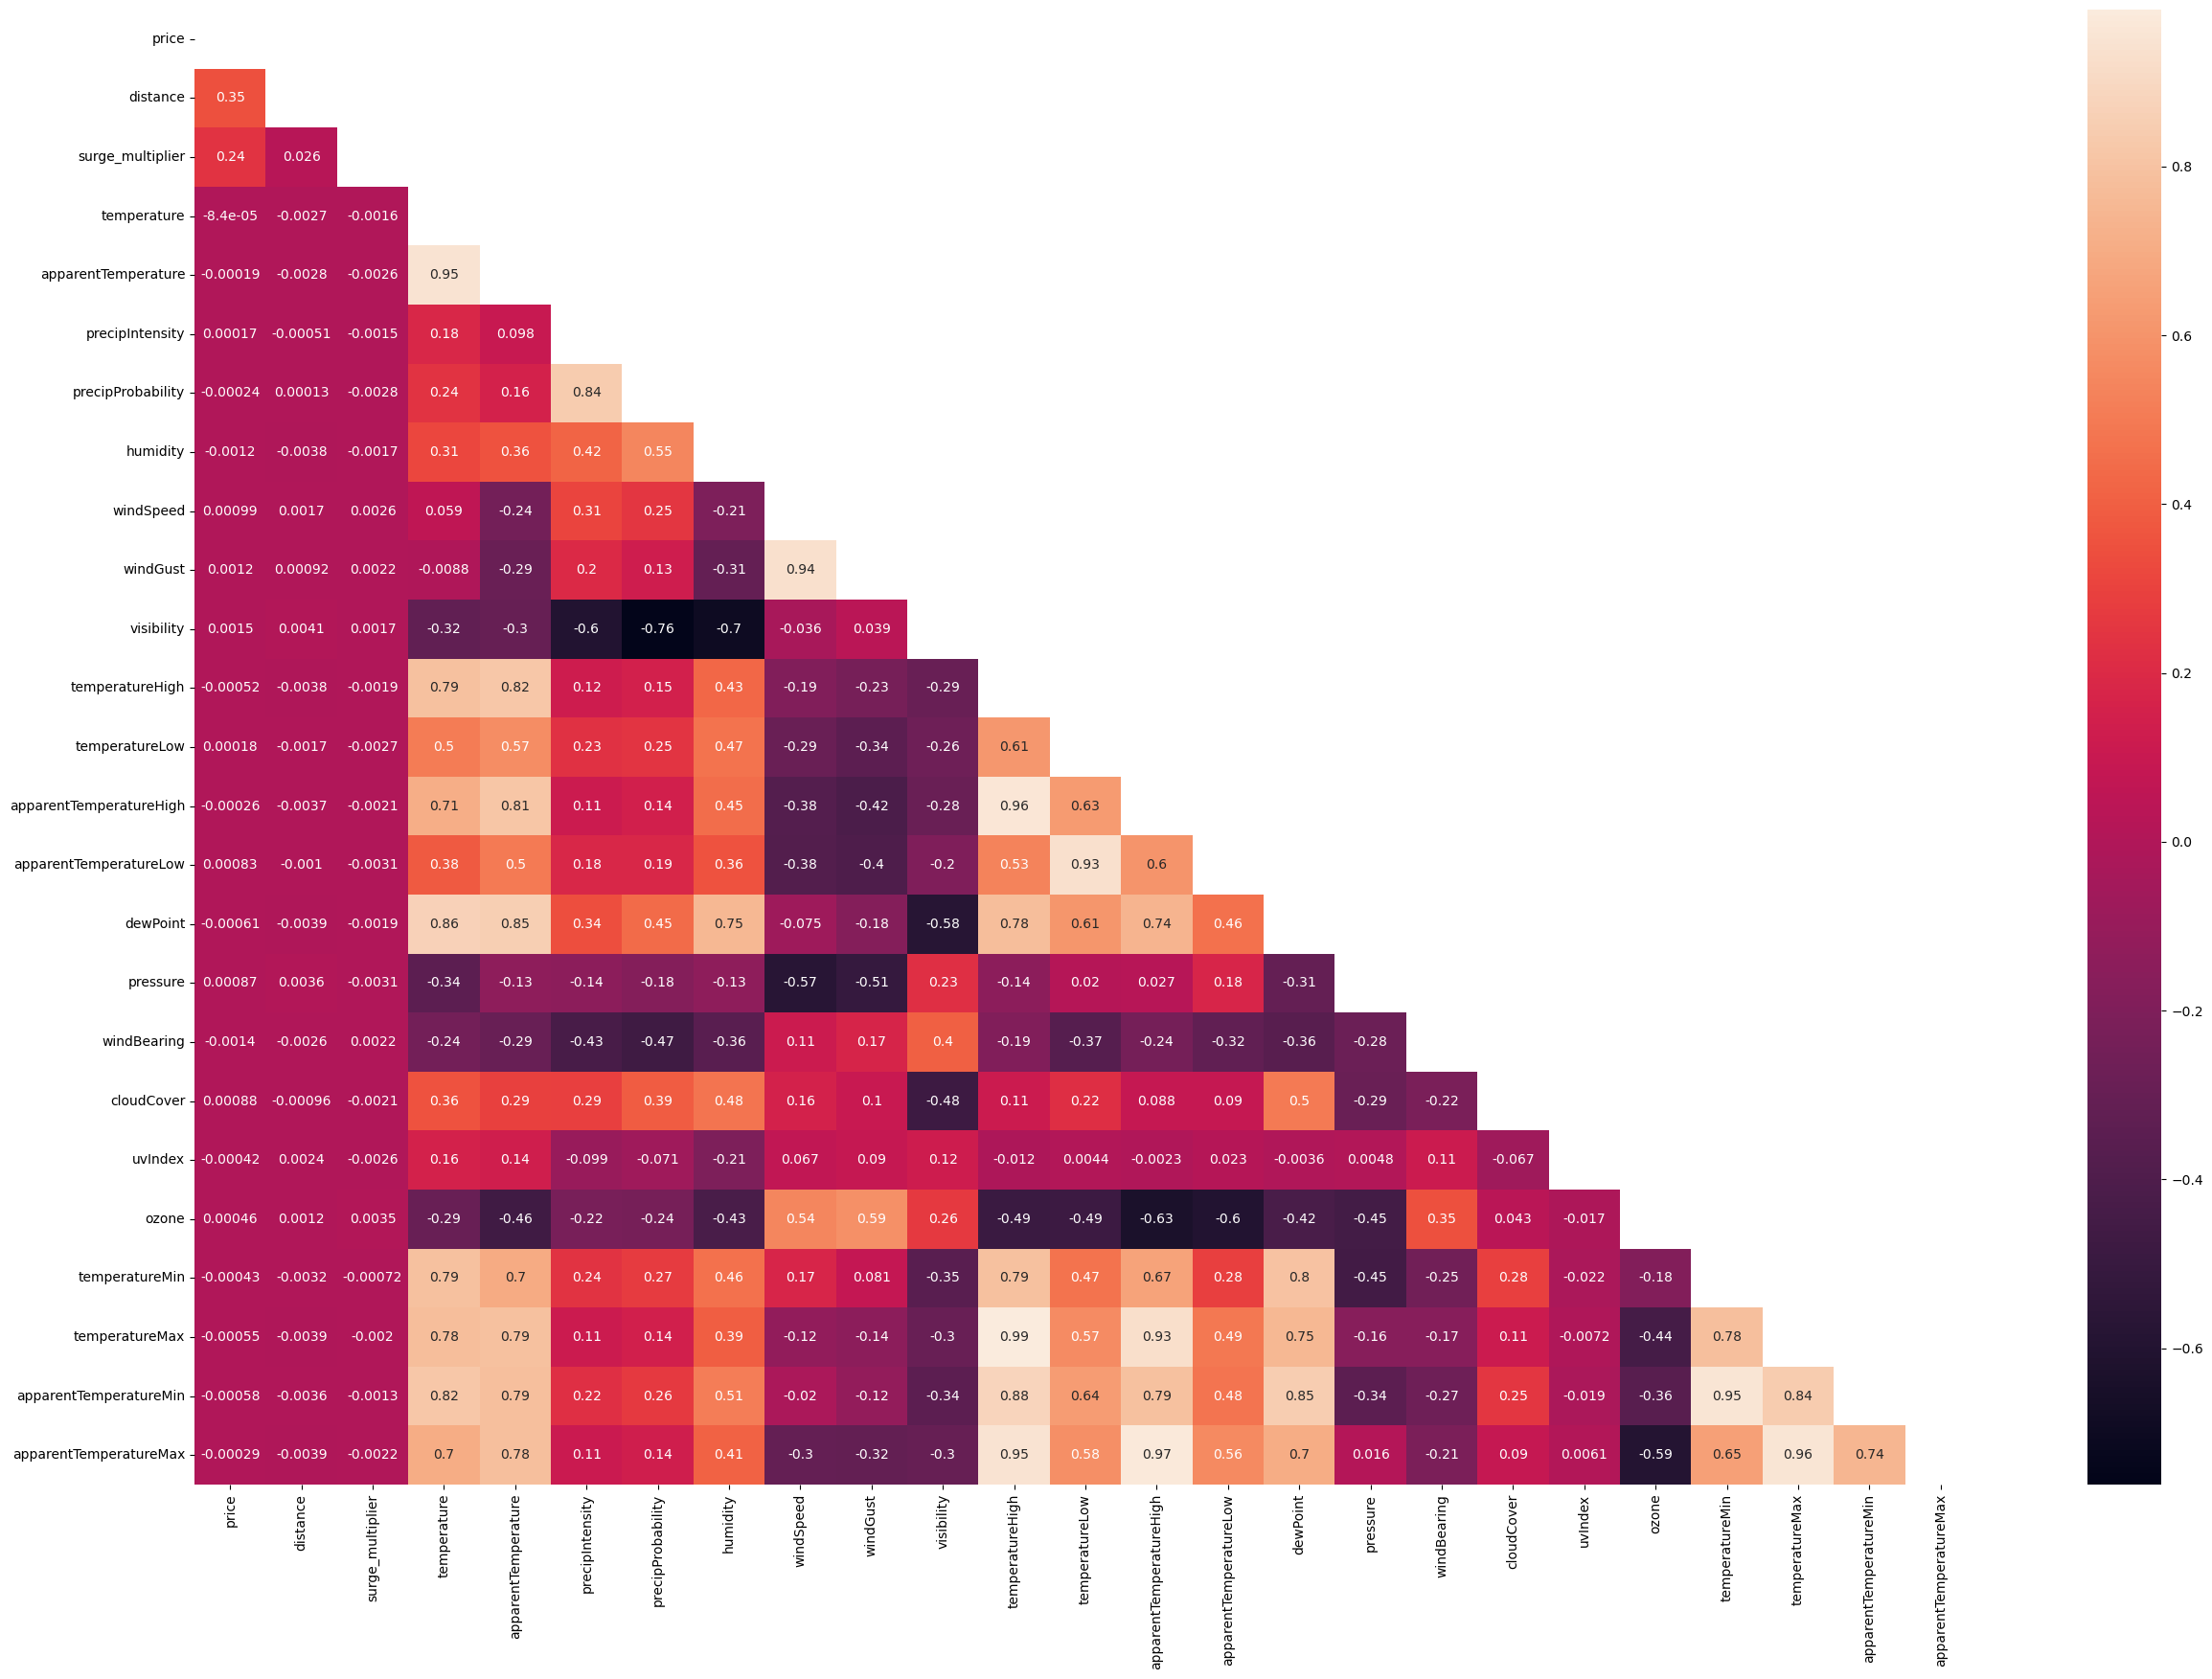

In [31]:
#plotting heatmap dengan correlation pada df1
plt.figure(figsize=(30,20))
sns.heatmap(df1.corr(),annot=True, mask=np.triu(df1.corr()))

In [32]:
df1.corr()

,price,distance,surge_multiplier,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
price,1.000000,0.345061,0.240458,-0.000084,-0.000193,0.000166,-0.000243,-0.001238,0.000990,0.001218,0.001497,-0.000516,0.000182,-0.000261,0.000831,-0.000615,0.000866,-0.001382,0.000883,-0.000424,0.000460,-0.000428,-0.000550,-0.000580,-0.000290
distance,0.345061,1.000000,0.025946,-0.002738,-0.002835,-0.000512,0.000134,-0.003849,0.001709,0.000920,0.004143,-0.003795,-0.001744,-0.003699,-0.001006,-0.003920,0.003565,-0.002638,-0.000958,0.002422,0.001206,-0.003192,-0.003875,-0.003649,-0.003889
surge_multiplier,0.240458,0.025946,1.000000,-0.001594,-0.002586,-0.001522,-0.002825,-0.001677,0.002593,0.002162,0.001716,-0.001943,-0.002669,-0.002098,-0.003088,-0.001860,-0.003109,0.002171,-0.002101,-0.002567,0.003456,-0.000716,-0.001998,-0.001317,-0.002214
temperature,-0.000084,-0.002738,-0.001594,1.000000,0.946157,0.182673,0.239189,0.313813,0.058846,-0.008775,-0.324158,0.788564,0.502193,0.710386,0.382828,0.863992,-0.339378,-0.244166,0.355049,0.158551,-0.291209,0.789220,0.780426,0.817443,0.703078
apparentTemperature,-0.000193,-0.002835,-0.002586,0.946157,1.000000,0.098346,0.158877,0.356485,-0.244323,-0.287227,-0.299337,0.821492,0.573985,0.811624,0.495844,0.849735,-0.134656,-0.293642,0.294789,0.138611,-0.462401,0.697343,0.792476,0.786478,0.782255
precipIntensity,0.000166,-0.000512,-0.001522,0.182673,0.098346,1.000000,0.838417,0.417526,0.307171,0.197778,-0.600613,0.119134,0.231904,0.114582,0.183193,0.338694,-0.143495,-0.433185,0.288915,-0.099148,-0.222201,0.236618,0.114034,0.224728,0.108917
precipProbability,-0.000243,0.000134,-0.002825,0.239189,0.158877,0.838417,1.000000,0.548855,0.251854,0.127322,-0.761438,0.147951,0.246409,0.142689,0.186820,0.445318,-0.179355,-0.469847,0.387142,-0.071207,-0.235100,0.274351,0.142088,0.263234,0.136403
humidity,-0.001238,-0.003849,-0.001677,0.313813,0.356485,0.417526,0.548855,1.000000,-0.207121,-0.306424,-0.697860,0.429811,0.471614,0.451102,0.357066,0.747305,-0.134010,-0.356532,0.480196,-0.208096,-0.425874,0.461536,0.394681,0.512080,0.410285
windSpeed,0.000990,0.001709,0.002593,0.058846,-0.244323,0.307171,0.251854,-0.207121,1.000000,0.937649,-0.035550,-0.188793,-0.286540,-0.378796,-0.384451,-0.074816,-0.574573,0.113264,0.159671,0.067389,0.544871,0.174181,-0.120540,-0.019857,-0.304331
windGust,0.001218,0.000920,0.002162,-0.008775,-0.287227,0.197778,0.127322,-0.306424,0.937649,1.000000,0.038898,-0.230810,-0.341706,-0.416502,-0.403827,-0.175292,-0.513851,0.168536,0.104673,0.089758,0.585006,0.081460,-0.144428,-0.116490,-0.316142


In [33]:
rata_harga = dc2[['name', 'cab_type', 'price']].groupby(['name', 'cab_type']).mean().sort_values(by='price', ascending=False)
rata_harga

,,price
name,cab_type,
Lux Black XL,Lyft,32.324086
Black SUV,Uber,30.286763
Lux Black,Lyft,23.062468
Black,Uber,20.523786
Lux,Lyft,17.771240
UberXL,Uber,15.678144
Lyft XL,Lyft,15.309363
UberX,Uber,9.765074
WAV,Uber,9.765019


Dari hasil tersebut diketahui type taxi Lyft dengan harga tertinggi adalah Lux Black XL dan terendag adalah Shared. Sedangkan untuk typ taxi Uber dengan harga tertinggi adalah  Black SUV dan harga terendah adalah UberPool.

In [34]:
# Menghitung jumlah pemakaian layanan taxi
dc2['cab_type'].value_counts()

Uber    330568
Lyft    307408
Name: cab_type, dtype: int64

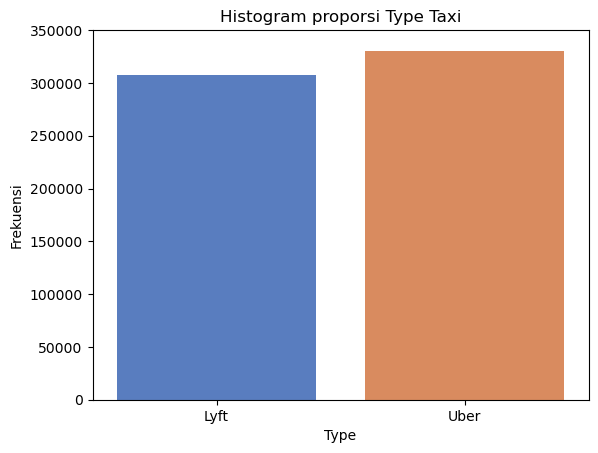

In [35]:
sns.countplot(x="cab_type", data=dc2, palette="muted")
plt.title('Histogram proporsi Type Taxi') 
plt.ylim(top=350000)
plt.ylabel('Frekuensi') 
plt.xlabel('Type')
plt.show()

# 6. Simple Linear Regression

**y = b0 + b1 * x1**

## 6.1 Data Preprocessing

In [36]:
df_simple = dc2[['price','distance']]

In [37]:
df_simple.head()

,price,distance
0,5.0,0.44
1,11.0,0.44
2,7.0,0.44
3,26.0,0.44
4,9.0,0.44


In [38]:
df_simple.shape

(637976, 2)

In [39]:
df_simple.describe()

,price,distance
count,637976.000000,637976.000000
mean,16.545125,2.189261
std,9.324359,1.135413
min,2.500000,0.020000
25%,9.000000,1.270000
50%,13.500000,2.160000
75%,22.500000,2.930000
max,97.500000,7.860000


In [40]:
# Membuat linear regression model
lr = LinearRegression()

In [41]:
# Defenisikan data
X = df_simple[["distance"]]
y = df_simple["price"]

## 6.2 Train Test Split

In [42]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=637)

In [43]:
# Melatih model
lr.fit(X_train,y_train)

LinearRegression()

In [44]:
# Predict the respon
y_pred = lr.predict(X_test)

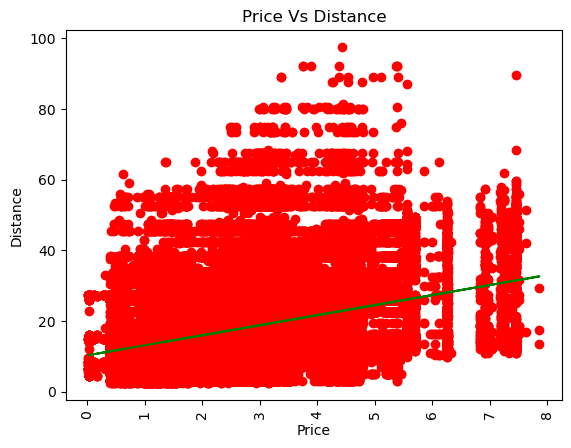

In [45]:
# Visuaslisasi data train
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, lr.predict(X_train), color = "green")
plt.title("Price Vs Distance")
plt.xlabel("Price")
plt.ylabel("Distance")
plt.xticks(rotation=90)
plt.show()

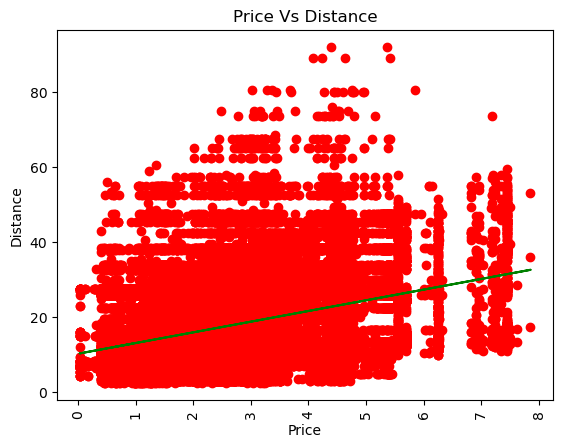

In [46]:
# Visuaslisasi data train
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, lr.predict(X_test), color = "green")
plt.title("Price Vs Distance")
plt.xlabel("Price")
plt.ylabel("Distance")
plt.xticks(rotation=90)
plt.show()

## 6.3 R Squared Score

In [47]:
from sklearn.metrics import r2_score
print("R2 Score is :",round(r2_score(y_test,y_pred),3)*100,"%")

R2 Score is : 11.799999999999999 %


## 6.4 Finding Intercept and Coefficient

In [48]:
lr.intercept_

print('Intercept: ', lr.intercept_)

Intercept:  10.330057235223379


In [49]:
lr.coef_[0]

print('Coefisien: ', lr.coef_[0])

Coefisien:  2.841409157375073


In [50]:
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics

# Hitung MAE (Mean Absolute Error)
mae = metrics.mean_absolute_error(y_test, y_pred)

# Hitung nilai MSE (Mean Squared Error)
lr_mse = mean_squared_error(y_pred, y_test)
lr_rmse = np.sqrt(lr_mse)

# Hitung MAPE (Mean Absolute Percentage Error)
mape = (mae / y_test).mean() * 100

print('MAE:', mae)
print('RMSE: %.4f' % lr_rmse)
print('MAPE: ', mape)

MAE: 7.10835633095529
RMSE: 8.7666
MAPE:  59.15580201743425


Dari hasil di atas didapatkan Nilai R2 Score adalah 11.8%. R2 Score mengukur sejauh mana variasi dalam data target (variabel yang diprediksi) dapat dijelaskan oleh model. Dalam kasus ini, sekitar 11.8% variasi dalam data target dapat dijelaskan oleh model regresi linear sederhana tersebut. Persamaan model yang didapatkan yaitu :

y = 10.330057235223379 + 2.841409157375073x1

dengan nilai MAE adalah 7.1084, RMSE adalah 8.7666, dan MAPE adalah 59.16%. Dari hasil tersebut dapat disumpulkan  bahwa model tersebyt  tidak cukup baik dalam menjelaskan variasi dalam data, seperti yang ditunjukkan oleh R2 Score yang rendah dan nilai mean abosulute yang cukup tinggi.

In [51]:
print("Predicted Price :",round(lr.predict([[20]])[0],2))

Predicted Price : 67.16


# 7. Multiple Linear Regression
**y = b0 + b1 * x1 + b2 * x2 + b3 * x3 + ... + bn * xn**

## 7.1 Data Preprocessing

In [52]:
df1.head()

,price,distance,cab_type,surge_multiplier,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,5.0,0.44,Lyft,1.0,42.34,37.12,0.0000,0.0,0.68,8.66,9.17,10.000,43.68,34.19,37.95,27.39,32.70,1021.98,57,0.72,0,303.8,39.89,43.68,33.73,38.07
1,11.0,0.44,Lyft,1.0,43.58,37.35,0.1299,1.0,0.94,11.98,11.98,4.786,47.30,42.10,43.92,36.20,41.83,1003.97,90,1.00,0,291.1,40.49,47.30,36.20,43.92
2,7.0,0.44,Lyft,1.0,38.33,32.93,0.0000,0.0,0.75,7.33,7.33,10.000,47.55,33.10,44.12,29.11,31.10,992.28,240,0.03,0,315.7,35.36,47.55,31.04,44.12
3,26.0,0.44,Lyft,1.0,34.38,29.63,0.0000,0.0,0.73,5.28,5.28,10.000,45.03,28.90,38.53,26.20,26.64,1013.73,310,0.00,0,291.1,34.67,45.03,30.30,38.53
4,9.0,0.44,Lyft,1.0,37.44,30.88,0.0000,0.0,0.70,9.14,9.14,10.000,42.18,36.71,35.75,30.29,28.61,998.36,303,0.44,0,347.7,33.10,42.18,29.11,35.75


In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   price                    637976 non-null  float64
 1   distance                 637976 non-null  float64
 2   cab_type                 637976 non-null  object 
 3   surge_multiplier         637976 non-null  float64
 4   temperature              637976 non-null  float64
 5   apparentTemperature      637976 non-null  float64
 6   precipIntensity          637976 non-null  float64
 7   precipProbability        637976 non-null  float64
 8   humidity                 637976 non-null  float64
 9   windSpeed                637976 non-null  float64
 10  windGust                 637976 non-null  float64
 11  visibility               637976 non-null  float64
 12  temperatureHigh          637976 non-null  float64
 13  temperatureLow           637976 non-null  float64
 14  appa

In [54]:
#Membuat variabel kategori untuk  tipe data object dan boolean
kategori = df1.select_dtypes(include=['object', 'bool']).columns.values

for col in kategori:
    print(col, "(", len(df1[col].unique()) , "values):\n", np.sort(df1[col].unique()))

cab_type ( 2 values):
 ['Lyft' 'Uber']


In [55]:
# encode variabel kategori
label_encoder = LabelEncoder()
for cols in kategori:
    df1[cols] = label_encoder.fit_transform(df1[cols])
df1

,price,distance,cab_type,surge_multiplier,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,5.0,0.44,0,1.0,42.34,37.12,0.0000,0.0,0.68,8.66,9.17,10.000,43.68,34.19,37.95,27.39,32.70,1021.98,57,0.72,0,303.8,39.89,43.68,33.73,38.07
1,11.0,0.44,0,1.0,43.58,37.35,0.1299,1.0,0.94,11.98,11.98,4.786,47.30,42.10,43.92,36.20,41.83,1003.97,90,1.00,0,291.1,40.49,47.30,36.20,43.92
2,7.0,0.44,0,1.0,38.33,32.93,0.0000,0.0,0.75,7.33,7.33,10.000,47.55,33.10,44.12,29.11,31.10,992.28,240,0.03,0,315.7,35.36,47.55,31.04,44.12
3,26.0,0.44,0,1.0,34.38,29.63,0.0000,0.0,0.73,5.28,5.28,10.000,45.03,28.90,38.53,26.20,26.64,1013.73,310,0.00,0,291.1,34.67,45.03,30.30,38.53
4,9.0,0.44,0,1.0,37.44,30.88,0.0000,0.0,0.70,9.14,9.14,10.000,42.18,36.71,35.75,30.29,28.61,998.36,303,0.44,0,347.7,33.10,42.18,29.11,35.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,9.5,1.00,1,1.0,37.05,37.05,0.0000,0.0,0.74,2.34,2.87,9.785,44.76,34.83,44.09,35.48,29.65,1023.57,133,0.31,0,271.5,31.42,44.76,27.77,44.09
693066,13.0,1.00,1,1.0,37.05,37.05,0.0000,0.0,0.74,2.34,2.87,9.785,44.76,34.83,44.09,35.48,29.65,1023.57,133,0.31,0,271.5,31.42,44.76,27.77,44.09
693067,9.5,1.00,1,1.0,37.05,37.05,0.0000,0.0,0.74,2.34,2.87,9.785,44.76,34.83,44.09,35.48,29.65,1023.57,133,0.31,0,271.5,31.42,44.76,27.77,44.09
693069,27.0,1.00,1,1.0,37.05,37.05,0.0000,0.0,0.74,2.34,2.87,9.785,44.76,34.83,44.09,35.48,29.65,1023.57,133,0.31,0,271.5,31.42,44.76,27.77,44.09


In [56]:
df1.describe()

,price,distance,cab_type,surge_multiplier,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
count,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.00000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000
mean,16.545125,2.189261,0.518151,1.015068,39.582406,35.87844,0.008909,0.145941,0.741056,6.186795,8.470616,8.469180,45.039586,34.148928,41.612514,30.137973,31.652281,1010.092744,220.112705,0.686291,0.249031,313.515634,33.456171,45.259945,29.729028,41.995876
std,9.324359,1.135413,0.499671,0.095422,6.725500,7.91726,0.026880,0.328776,0.138575,3.147856,5.288683,2.601828,5.996033,6.381731,7.665189,8.056278,9.141390,13.475580,99.087172,0.358599,0.474306,27.951377,6.466349,5.644414,7.109907,6.935538
min,2.500000,0.020000,0.000000,1.000000,18.910000,12.13000,0.000000,0.000000,0.380000,0.450000,0.800000,0.717000,32.680000,17.850000,22.620000,11.810000,4.390000,988.090000,2.000000,0.000000,0.000000,269.400000,15.630000,33.510000,11.810000,28.950000
25%,9.000000,1.270000,0.000000,1.000000,36.450000,31.91000,0.000000,0.000000,0.640000,3.410000,4.060000,8.432000,42.570000,30.170000,36.570000,27.700000,27.490000,999.820000,124.000000,0.370000,0.000000,290.900000,30.170000,42.570000,27.760000,36.570000
50%,13.500000,2.160000,1.000000,1.000000,40.490000,35.90000,0.000000,0.000000,0.710000,5.910000,7.550000,9.880000,44.660000,34.180000,40.950000,30.030000,30.690000,1009.250000,258.000000,0.820000,0.000000,307.400000,34.240000,44.660000,30.130000,40.950000
75%,22.500000,2.930000,1.000000,1.000000,43.580000,40.01000,0.000000,0.000000,0.880000,8.410000,11.740000,9.996000,46.910000,38.730000,44.120000,35.320000,38.120000,1021.860000,303.000000,1.000000,0.000000,331.800000,38.880000,46.910000,35.710000,44.120000
max,97.500000,7.860000,1.000000,3.000000,57.220000,57.22000,0.144700,1.000000,0.960000,15.000000,27.250000,10.000000,57.870000,46.600000,57.200000,47.250000,50.670000,1035.550000,356.000000,1.000000,2.000000,378.900000,43.100000,57.870000,40.050000,57.200000


In [57]:
# Defenisiskan data
X= df1.drop('price', axis=1)
y= df1['price']

## 7.2 Train Test Split

In [58]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=761)

In [59]:
# Melakukan proses scaling pada variabel prediktor
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
# Cetak jumlah data pada masing-masing set
print('Shape of X:', X.shape)
print('Shape of Y:', y.shape)
print("Shape of X Train: ", X_train.shape)
print("Shape of Y Train: ", y_train.shape)
print("Shape of X Test: ", X_test.shape)
print("Shape of Y Test: ", y_test.shape)

Shape of X: (637976, 25)
Shape of Y: (637976,)
Shape of X Train:  (446583, 25)
Shape of Y Train:  (446583,)
Shape of X Test:  (191393, 25)
Shape of Y Test:  (191393,)


In [61]:
# Membuat linear regression model
lr = LinearRegression()

In [62]:
# Melatih model
lr.fit(X_train,y_train)

LinearRegression()

In [63]:
# Predict the respon
y_pred = lr.predict(X_test)

## 7.3 Adjusted R Squared & R Squared Score

In [64]:
r_squared = r2_score(y_test,y_pred)

In [65]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)

In [66]:
print('Adjusted R Squared: %',round(adjusted_r_squared*100,2), 'R Squared: %',round(r_squared*100,2))

Adjusted R Squared: % 17.43 R Squared: % 17.44


## 7.4 Finding Intercept and Coefficient

In [67]:
print("Intercept is ",lr.intercept_,"and Coefficients are", lr.coef_)

Intercept is  -12.36742786731099 and Coefficients are [ 2.79064737e+00 -8.69267222e-01  2.19830928e+01 -9.16568262e-03
 -6.92178092e-03  5.28016126e-01 -2.12591724e-02 -6.97763051e-01
 -1.20253569e-02  8.42264403e-03  5.23063436e-03  2.69280636e-01
 -1.29467465e-02 -1.59696753e-01  1.20128861e-02  2.01208733e-02
  1.21438489e-03  6.75319941e-05  7.37850908e-02 -1.85905695e-02
  8.42260544e-04 -7.62468659e-04 -2.88672647e-01  8.30897582e-03
  1.73233268e-01]


In [68]:
# Hitung MAE (Mean Absolute Error)
mae = metrics.mean_absolute_error(y_test, y_pred)

# Hitung nilai MSE (Mean Squared Error)
lr_mse = mean_squared_error(y_pred, y_test)
lr_rmse = np.sqrt(lr_mse)

# Hitung MAPE (Mean Absolute Percentage Error)
mape = (mae / y_test).mean() * 100

print('MAE:', mae)
print('RMSE: %.4f' % lr_rmse)
print('MAPE: ', mape)

MAE: 6.921557934877321
RMSE: 8.4739
MAPE:  57.46852375921784


Text(0.5, 1.0, 'Linear Regression Train Data')

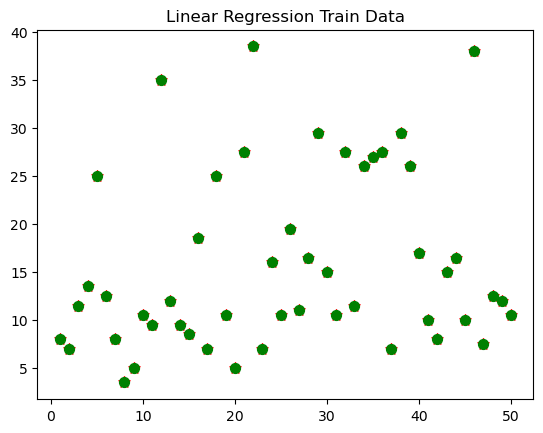

In [69]:
plt.scatter(x=range(1,51),y=y_train[:50],marker='*',c='r',s=70,label=['y_test'])
plt.scatter(x=range(1,51),y=y_train[:50],marker='o',c='g',s=50,label=['y_pred'])
plt.title('Linear Regression Train Data')

Text(0.5, 1.0, 'Linear Regression Test Data')

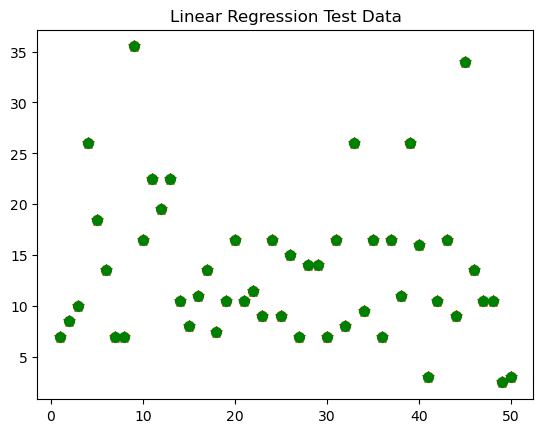

In [70]:
plt.scatter(x=range(1,51),y=y_test[:50],marker='*',c='r',s=70,label=['y_test'])
plt.scatter(x=range(1,51),y=y_test[:50],marker='o',c='g',s=50,label=['y_pred'])
plt.title('Linear Regression Test Data')

In [71]:
# Mengambil koefisien dari model
coefficients = lr.coef_

# Membuat DataFrame untuk menampilkan koefisien beserta nama fitur
coefficients_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Mengurutkan koefisien dari yang paling besar
sorted_coefficients = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Menampilkan hasil urutan koefisien
print(sorted_coefficients)

                    Feature  Coefficient
2          surge_multiplier    21.983093
0                  distance     2.790647
5           precipIntensity     0.528016
11          temperatureHigh     0.269281
24   apparentTemperatureMax     0.173233
18               cloudCover     0.073785
15                 dewPoint     0.020121
14   apparentTemperatureLow     0.012013
9                  windGust     0.008423
23   apparentTemperatureMin     0.008309
10               visibility     0.005231
16                 pressure     0.001214
20                    ozone     0.000842
17              windBearing     0.000068
21           temperatureMin    -0.000762
4       apparentTemperature    -0.006922
3               temperature    -0.009166
8                 windSpeed    -0.012025
12           temperatureLow    -0.012947
19                  uvIndex    -0.018591
6         precipProbability    -0.021259
13  apparentTemperatureHigh    -0.159697
22           temperatureMax    -0.288673
7               

Dari hasil di atas didapatkan Nilai R2 Score adalah 11.8%. R2 Score mengukur sejauh mana variasi dalam data target (variabel yang diprediksi) dapat dijelaskan oleh model. Dalam kasus ini, sekitar 17.44% variasi dalam data target dapat dijelaskan oleh model regresi linear sederhana tersebut. Persamaan model yang didapatkan yaitu :

y = -12.36742786731099 + 2.79064737e+00X1 - 8.69267222e-01X2 +  2.19830928e+01X3 - 9.16568262e-03X4 - 6.92178092e-03X5 + 5.28016126e-01X6 - 2.12591724e-02X7 - 6.97763051e-01X8 - 1.20253569e-02X9 + 8.42264403e-03X10 + 5.23063436e-03X11 + 2.69280636e-01X12 - 1.29467465e-02X13 - 1.59696753e-01X14 + 1.20128861e-02X15 + 2.01208733e-02X16 + 1.21438489e-03X17 + 6.75319941e-05X18 + 7.37850908e-02X19 - 1.85905695e-02X20 + 8.42260544e-04X21 - 7.62468659e-04X22 - 2.88672647e-01X23 + 8.30897582e-03X24 + 1.73233268e-01X25

dengan nilai MAE adalah 6.921, RMSE adalah 8.4739, dan MAPE adalah 57.47%. Dari hasil tersebut dapat disumpulkan bahwa model tersebut tidak cukup baik dalam menjelaskan variasi dalam data, seperti yang ditunjukkan oleh R2 Score yang rendah dan nilai mean abosulute yang cukup tinggi.

# 8. Kesimpulan

Dari analisis tersebut dapat disimpulkan:
- Dari data tersebut dapat dilihat bahwa taxi Uber cenderung menawarkan harga yang lebih murah daripada Lyft.
- Type taxi Lyft dengan harga tertinggi adalah Lux Black XL dan terendah adalah Shared. Sedangkan untuk typ taxi Uber dengan harga tertinggi adalah Black SUV dan harga terendah adalah UberPool.
- Dari analisis model simple linear regresi dengan variabel independen 'distance' dan dependen 'price' diketahui bahwa variabel independen mempengaruhi variabel dependen sebesar 11.79% dengan Mean Absolute Percentage Error (MAPE) sebesar 59.16%.
- Dari analisis model multiple linear regresi dengan variabel independen sebanyak 25 variabel dan dependen 'price' diketahui bahwa variabel independen mempengaruhi variabel dependen sebesar 11.8% dengan Mean Absolute Percentage Error (MAPE) sebesar 57.47%.
- Dua Feature yang paling mempengaruhi harga berdasarkan analisis model multiple linear regresi yaitu surge_multiplier dan distance.
- Dari hasil tersebut dapat disumpulkan bahwa model tersebut tidak cukup baik dalam menjelaskan variasi dalam data, seperti yang ditunjukkan oleh R2 Score yang rendah dan nilai mean abosulute yang cukup tinggi.